#  SALES PREDICTION
## AN LE

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Contents

<table>
<tbody>
<tr>
<th style="width:10%"
<td>**1.**</td><td>Abstract...................................................................</td><td> </td>
</th>
<tr>
<td>**2.**</td><td>Method and Results...............................................</td><td> </td>
</tr>
<tr>
<td></td><td>**2.1** Importing libraries into Python.........................</td><td> </td>
</tr>
<tr>
<td></td><td>**2.2** Data Description.............................................. </td><td> </td>
>
<tr>
<td></td><td>**2.3** Data Validation and Data Wrangling................................................ </td><td> </td>
</tr>
<tr>
<td></td><td>**2.4** Training Predicting data............. </td><td> </td>
</tr>
<tr>
<td>**3.**</td><td>Conclusion.............................................................</td><td></td>
</tbody></table>

<br>

## 1. ABSTRACT
The report is to generate the sales prediction for 2018 base on the training datasets 

## 2. Method and results

### 2.1 Importing libraries into Python

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import glob
from bokeh.plotting import figure, show, output_notebook
from IPython.core.display import HTML

%matplotlib inline

rcParams['figure.figsize'] = 20, 10
rcParams['font.size'] = 20

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

# Any results you write to the current directory are saved as output.

### 2.2 Data Description.

In [70]:
train=pd.read_csv("./input/train.csv",index_col='date',parse_dates=True)
train.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [5]:
train.tail()

,store,item,sales
date,,,
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74
2017-12-30,10,50,62
2017-12-31,10,50,82


In [6]:
test=pd.read_csv("./input/test.csv",index_col='date',parse_dates=True)
test.head()

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1


In [7]:

test.head()

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1


### 2.3 Data Validation and Data Wrangling

Create data about date for training purpose 

In [8]:
test['year'] = test.index.year
test['month'] = test.index.month
test['day'] = test.index.day
test['dayofyear'] = test.index.dayofyear
test['dayofweek'] = test.index.dayofweek
test['weekofyear'] = test.index.weekofyear

transfer data  in monthly record and calculate daily percentage changes

In [9]:
df=pd.DataFrame(train['sales'].resample("M",how='sum'))
df['Monthly_percentage_change']=(df.sales-df.sales.shift(1))/df.sales
df.head()

,sales,Monthly_percentage_change
date,,
2013-01-31,454904,NaN
2013-02-28,459417,0.009823
2013-03-31,617382,0.255863
2013-04-30,682274,0.095111
2013-05-31,763242,0.106084


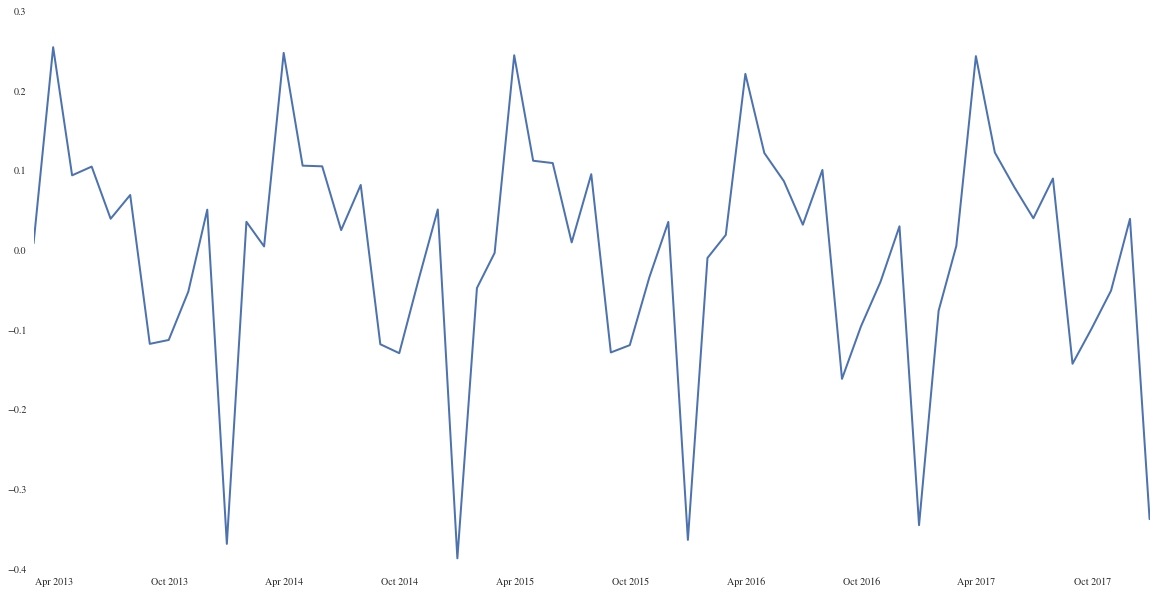

In [10]:
plt.plot(df.index[1:],df.Monthly_percentage_change.dropna())

The dataset showed that there is yearly cycle

Resampleing data into quater

In [11]:
df1=pd.DataFrame(train['sales'].resample("Q",how='sum'))
df1['Quarterly_percentage_change']=(df1.sales-df1.sales.shift(1))/df1.sales
df1.head()

,sales,Quarterly_percentage_change
date,,
2013-03-31,1531703,NaN
2013-06-30,2241113,0.316544
2013-09-30,2312590,0.030908
2013-12-31,1855837,-0.246117
2014-03-31,1759405,-0.054809


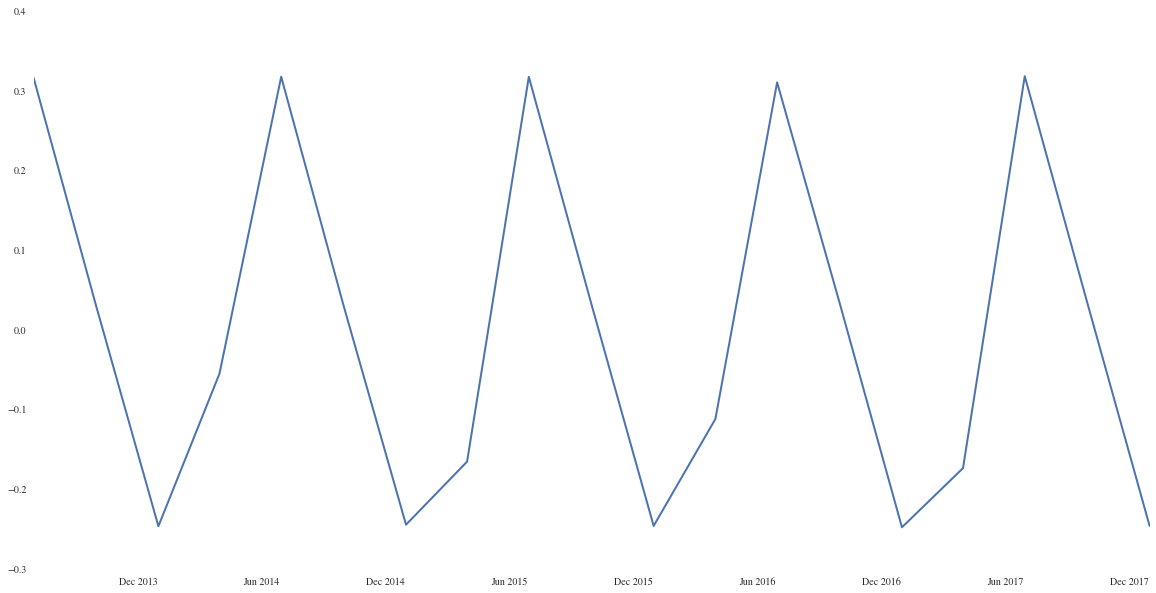

In [12]:
plt.plot(df1.index[1:],df1.Quarterly_percentage_change.dropna())

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: int64(3)
memory usage: 27.9 MB


In [14]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [15]:
test.head()

,id,store,item,year,month,day,dayofyear,dayofweek,weekofyear
date,,,,,,,,,
2018-01-01,0,1,1,2018,1,1,1,0,1
2018-01-02,1,1,1,2018,1,2,2,1,1
2018-01-03,2,1,1,2018,1,3,3,2,1
2018-01-04,3,1,1,2018,1,4,4,3,1
2018-01-05,4,1,1,2018,1,5,5,4,1


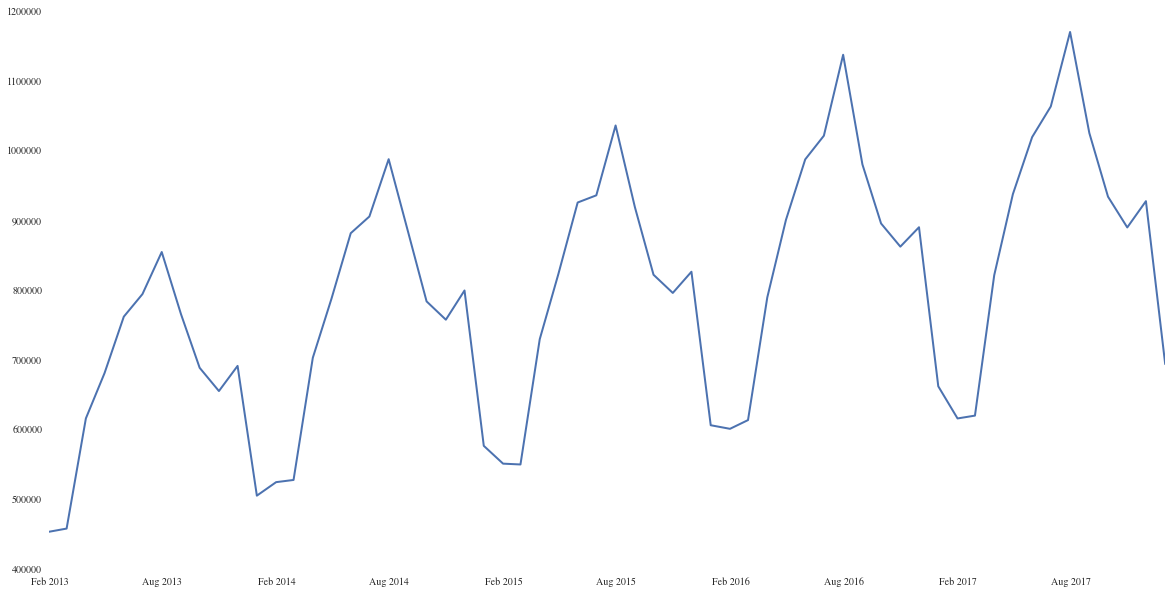

In [16]:
plt.plot(df.index,df.sales)

The Sales had the upward trend the over the period from 2013 to 2017

In [17]:
df=train.groupby([pd.Grouper(freq='D')]).sum()


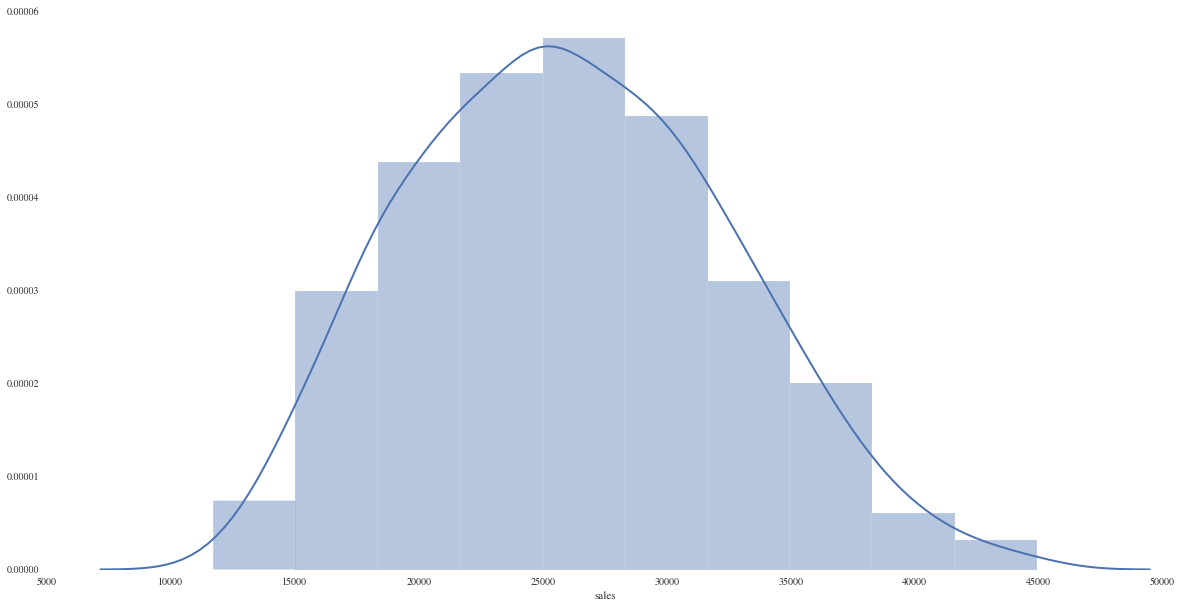

In [18]:
sns.distplot(df['sales'],bins=10)

In [19]:
Most of the sales felt into ranging from $60,000 to $140,000

SyntaxError: invalid syntax (<ipython-input-19-61922cd401c7>, line 1)

In [21]:
df1.head()

,sales,Quarterly_percentage_change
date,,
2013-03-31,1531703,NaN
2013-06-30,2241113,0.316544
2013-09-30,2312590,0.030908
2013-12-31,1855837,-0.246117
2014-03-31,1759405,-0.054809


In [72]:
store=pd.DataFrame(train[train['store']==1]['sales'].resample("Q",how='sum'))
store.head()

,sales
date,
2013-03-31,138210
2013-06-30,202326
2013-09-30,209680
2013-12-31,167624
2014-03-31,159355


In [90]:
store.head()

,1,2,3,4,5,6,7,8,9,10
date,,,,,,,,,,
2013-03-31,138210,197513,174122,161048,116405,116966,106461,188211,160799,171968
2013-06-30,202326,288506,255090,236188,170542,170091,155667,275118,235295,252290
2013-09-30,209680,296310,263445,242755,175987,175892,161030,283814,243717,259960
2013-12-31,167624,237909,211279,195068,140849,141424,129065,227512,195977,209130
2014-03-31,159355,225467,200362,184811,133525,134041,122852,215924,185653,197415


In [78]:
j=1
for i in range (9):
    j+=1
    store[j]=train[train['store']==j]['sales'].resample("Q",how='sum')
     

In [76]:
store=store.rename(columns={'sales':1})

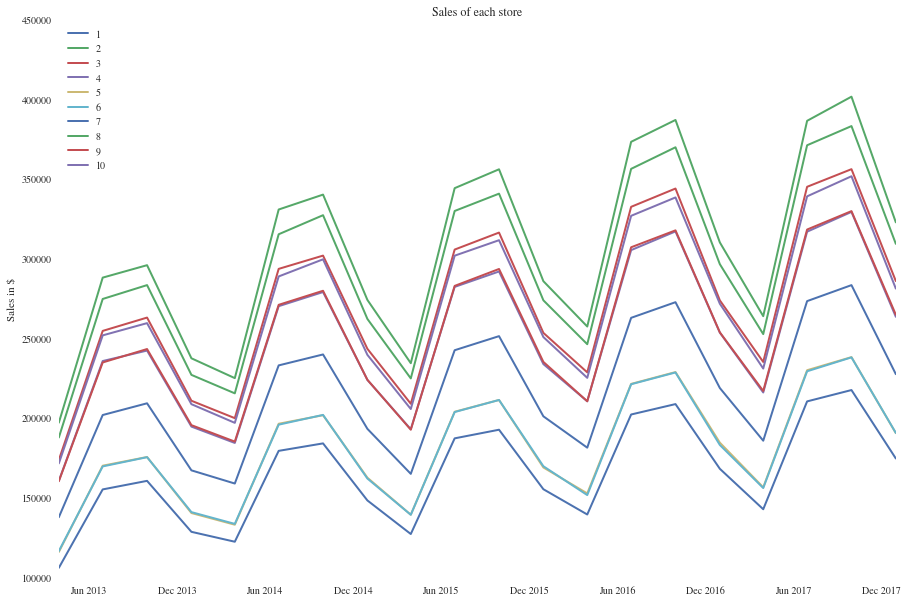

In [124]:
rcParams['figure.figsize'] = 15, 10

plt.plot(store.index, store)
plt.ylabel('Sales in $')
plt.title('Sales of each store')
plt.legend(store.columns,loc='best')
plt.show()

In [125]:
train.groupby([pd.Grouper(freq='D')]).sum().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
store    1826 non-null int64
item     1826 non-null int64
sales    1826 non-null int64
dtypes: int64(3)
memory usage: 57.1 KB


In [126]:
train.tail()


,store,item,sales
date,,,
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74
2017-12-30,10,50,62
2017-12-31,10,50,82


Transform the training sets

In [127]:
train['year'] = train.index.year
train['month'] = train.index.month
train['day'] = train.index.day
train['dayofyear'] = train.index.dayofyear
train['dayofweek'] = train.index.dayofweek
train['weekofyear'] = train.index.weekofyear

In [128]:
train['daily_percentage_change']=train.sales.pct_change(1)

In [133]:
from pandas.tools.plotting import scatter_matrix

In [132]:
#from pandas.plotting import scatter_matrix

ImportError: No module named plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B6956A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002F61E0B8>]], dtype=object)

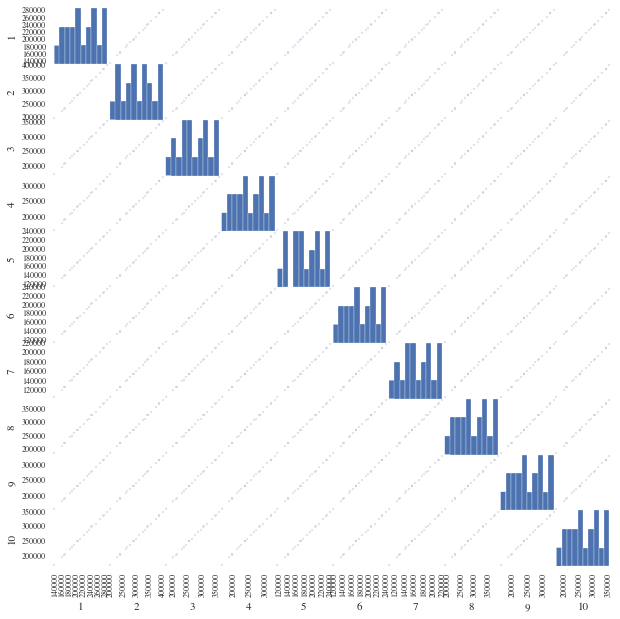

In [134]:
scatter_matrix(store,figsize=(10,10),alpha=0.2)

In [136]:
X=train.drop('sales',axis=1)

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import warnings

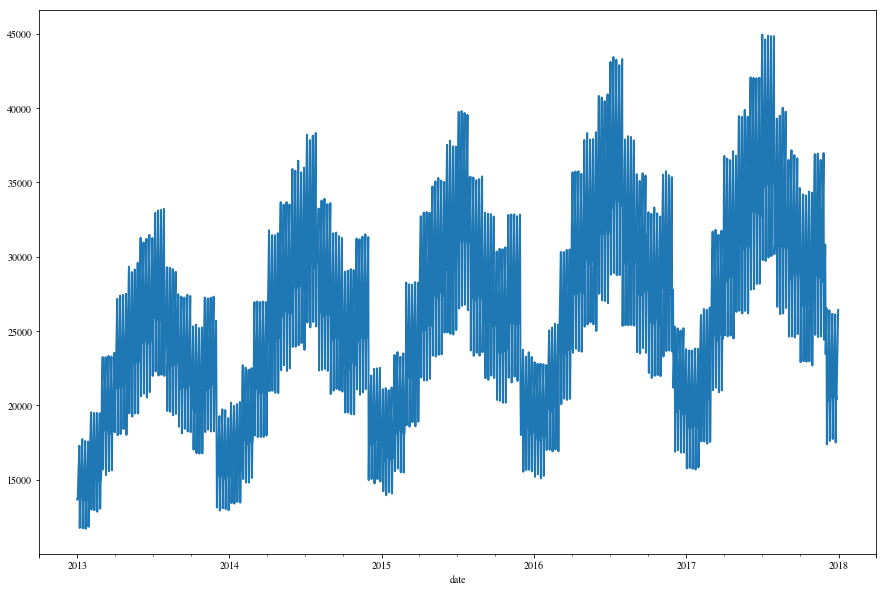

In [124]:
df['sales'].plot()

## 2.3 Data Validation and Data Wrangling

In [139]:
#using stat model to get the trend of sales
import statsmodels.api as sm

In [140]:
cycle,trend=sm.tsa.filters.hpfilter(train.sales)


In [141]:
train['trend']=trend

In [142]:
df=train.groupby([pd.Grouper(freq='D')]).sum()

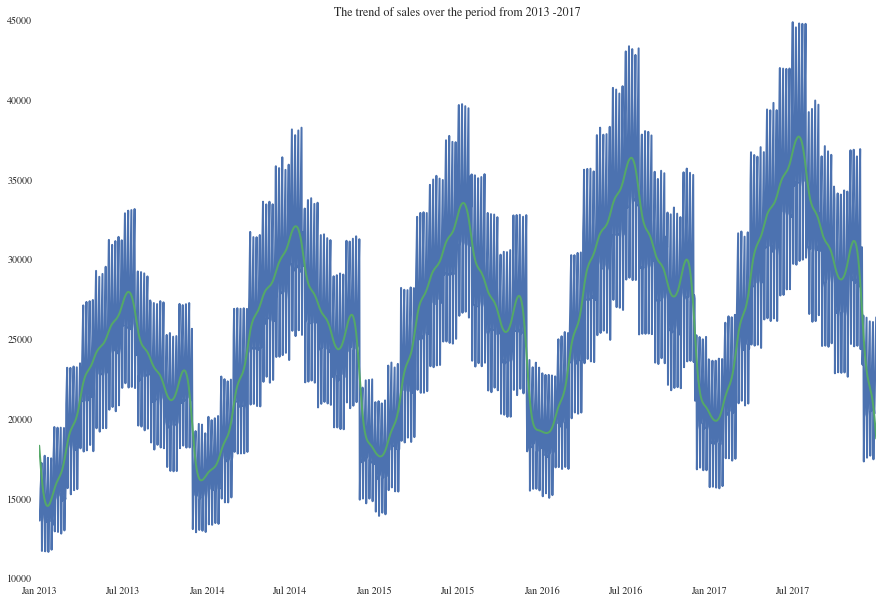

In [172]:
plt.plot(df.index,df[['sales','trend']])
plt.title("The trend of sales over the period from 2013 -2017")

In [117]:
test.head()

,id,store,item,year,month,day,dayofyear,dayofweek,weekofyear
date,,,,,,,,,
2018-01-01,0,1,1,2018,1,1,1,0,1
2018-01-02,1,1,1,2018,1,2,2,1,1
2018-01-03,2,1,1,2018,1,3,3,2,1
2018-01-04,3,1,1,2018,1,4,4,3,1
2018-01-05,4,1,1,2018,1,5,5,4,1


In [145]:
train=train[['store', 'item', 'sales', 'year', 'month',
       'day', 'dayofyear', 'dayofweek', 'weekofyear',
       'daily_percentage_change','trend']]

In [146]:
train.head()

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,daily_percentage_change,trend
date,,,,,,,,,,,
2013-01-01,1,1,13,2013,1,1,1,1,1,NaN,11.694375
2013-01-02,1,1,11,2013,1,2,2,2,1,-0.153846,11.534054
2013-01-03,1,1,14,2013,1,3,3,3,1,0.272727,11.374548
2013-01-04,1,1,13,2013,1,4,4,4,1,-0.071429,11.216340
2013-01-05,1,1,10,2013,1,5,5,5,1,-0.230769,11.061554


In [147]:
#drop nan and infinity  values
train=train.replace(np.inf,np.nan).dropna()

In [148]:
tr=train[train['year']<=2016]

In [149]:
te=train[train['year']>2016]

In [150]:
tr.head()

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,daily_percentage_change,trend
date,,,,,,,,,,,
2013-01-02,1,1,11,2013,1,2,2,2,1,-0.153846,11.534054
2013-01-03,1,1,14,2013,1,3,3,3,1,0.272727,11.374548
2013-01-04,1,1,13,2013,1,4,4,4,1,-0.071429,11.216340
2013-01-05,1,1,10,2013,1,5,5,5,1,-0.230769,11.061554
2013-01-06,1,1,12,2013,1,6,6,6,1,0.200000,10.913427


### 2.4 Training Predicting data

In [151]:
X_train=tr.drop('sales',axis=1)
X_test =te.drop('sales',axis=1)
y_train=tr.sales
y_test=te.sales

In [152]:
X_train.head()

,store,item,year,month,day,dayofyear,dayofweek,weekofyear,daily_percentage_change,trend
date,,,,,,,,,,
2013-01-02,1,1,2013,1,2,2,2,1,-0.153846,11.534054
2013-01-03,1,1,2013,1,3,3,3,1,0.272727,11.374548
2013-01-04,1,1,2013,1,4,4,4,1,-0.071429,11.216340
2013-01-05,1,1,2013,1,5,5,5,1,-0.230769,11.061554
2013-01-06,1,1,2013,1,6,6,6,1,0.200000,10.913427


#### This report used Decision tree  RandomForestRegressor model to trainiing data

In [153]:
est = DecisionTreeRegressor().fit(X_train, y_train)


In [154]:
result=pd.DataFrame( est.predict(X_test),columns=['pre'])
result.head()

,pre
0,24
1,12
2,8
3,20
4,14


In [155]:
y_test.reset_index()

,date,sales
0,2017-01-01,19
1,2017-01-02,15
2,2017-01-03,10
3,2017-01-04,16
4,2017-01-05,14
5,2017-01-06,24
6,2017-01-07,14
7,2017-01-08,20
8,2017-01-09,18
9,2017-01-10,11


In [156]:
result['test']=y_test.values

In [157]:
result.head()

,pre,test
0,24,19
1,12,15
2,8,10
3,20,16
4,14,14


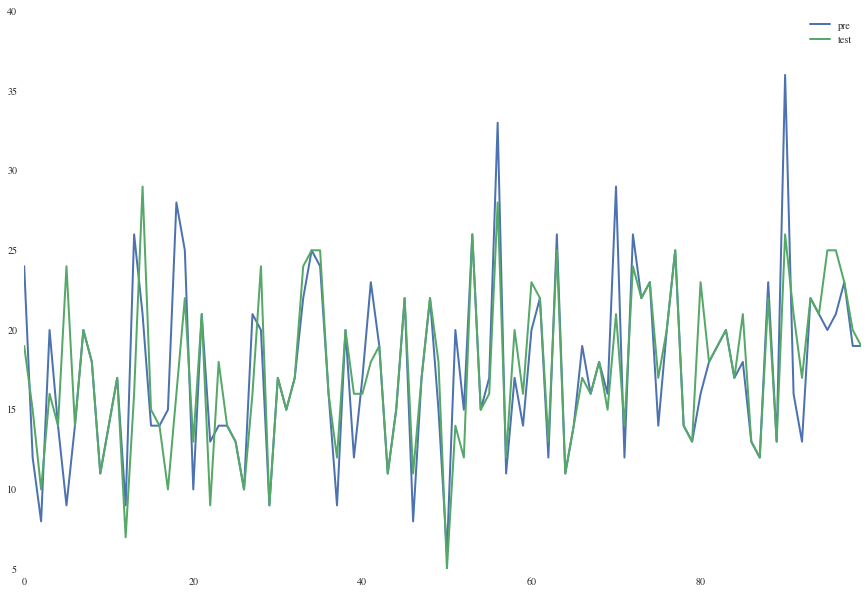

In [158]:
result[0:100].plot()

In [159]:
est = RandomForestRegressor().fit(X_train, y_train)
result=pd.DataFrame( est.predict(X_test),columns=['pre'])
result['test']=y_test.values


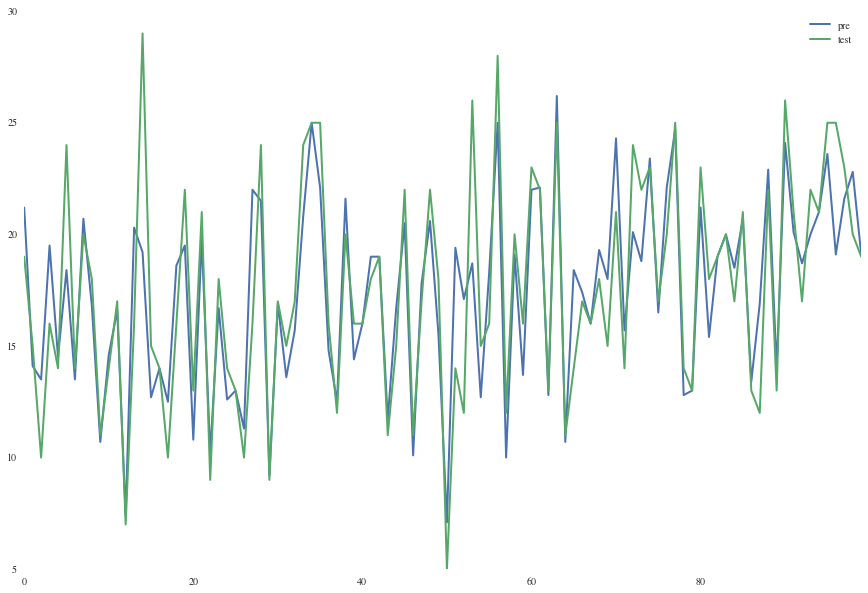

In [160]:
result[0:100].plot()

#### The author has compared the 2 graph and reckon that the RandomForestRegressor produced higher matches than the other one.

In [163]:
est = RandomForestRegressor().fit(train[['store', 'item', 'year', 'month', 'day', 'dayofyear',
       'dayofweek', 'weekofyear']], train['daily_percentage_change'])
test['daily_percentage_change']=est.predict(test[['store', 'item', 'year', 'month', 'day', 'dayofyear', 'dayofweek',
       'weekofyear']])

In [164]:
est = RandomForestRegressor().fit(train[['store', 'item', 'year', 'month', 'day', 'dayofyear',
       'dayofweek', 'weekofyear','daily_percentage_change']], train['trend'])
test['trend']=est.predict(test[['store', 'item', 'year', 'month', 'day', 'dayofyear', 'dayofweek',
       'weekofyear','daily_percentage_change']])

In [165]:
test=test[['id', 'store', 'item', 'year', 'month', 'day', 'dayofyear', 'dayofweek',
       'weekofyear','daily_percentage_change','trend']]

### 3. Conclusion
#### As the result,RandomForestRegressor have been chosen to predict the sales of the predicting datasets

In [166]:
est =  RandomForestRegressor().fit(train.drop(['sales'],axis=1), train.sales)
test['sales']= est.predict(test.drop('id',axis=1))



In [167]:
result=pd.DataFrame(test[['id','sales']]).reset_index()

In [168]:
result=result[['id','sales']]

In [170]:
result.head()

,id,sales
0,0,18
1,1,11
2,2,16
3,3,18
4,4,10


In [169]:
result.to_csv("./submission.csv")